In [1]:
import warnings
import numpy as np
import pandas as pd
import mlrose_hiive

from matplotlib import pyplot as plt

from sklearn.model_selection import  train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore', category=RuntimeWarning)

In [3]:
scaler_spam = MinMaxScaler()

# Loading the dataset from the CSV file
df_spam_loaded = pd.read_csv(r"File_path.csv")

# CHANGE THE FILE PATH!
# Separate features and target
X_spam = df_spam_loaded.drop('target', axis=1)
y_spam = df_spam_loaded['target']

X_norm = pd.DataFrame(scaler_spam.fit_transform(X_spam), columns=X_spam.columns)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_spam, test_size=0.2, random_state=42)
print("done")

done


Randomized Hill Climb - Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.83      0.88      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.83      0.83       238
weighted avg       0.84      0.84      0.84       238



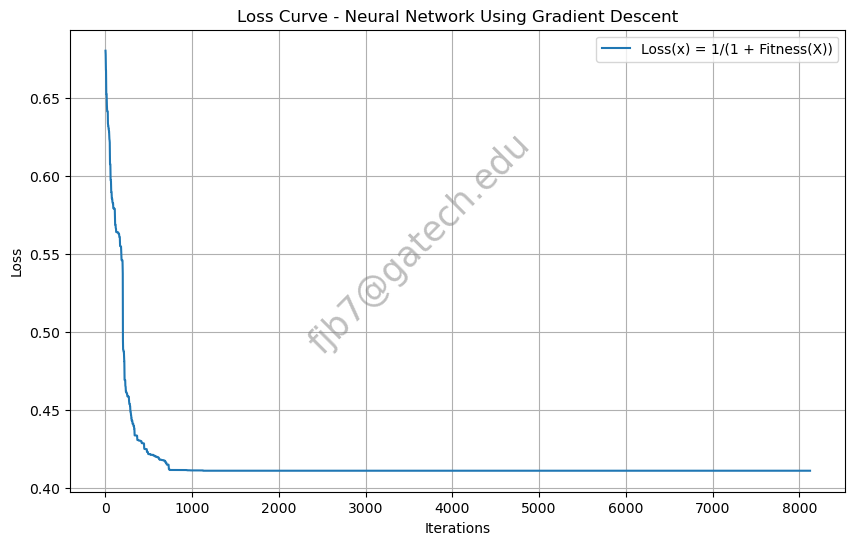

In [7]:
gd_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[5],
    activation='sigmoid',
    max_iters=8000,
    learning_rate=1.2,
    curve=True,
    random_state=42,
)
gd_nn.fit(X_train, y_train)

print(f"Randomized Hill Climb - Classification Report: \n {classification_report(y_test, gd_nn.predict(X_test))}")

plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - Neural Network Using Gradient Descent')
plt.plot(gd_nn.fitness_curve[:, 1], gd_nn.fitness_curve[:, 0], label="Loss(x) = 1/(1 + Fitness(X))")
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.legend()
plt.grid(True)
plt.savefig("./results/nn/gd/loss_curve.png")
plt.show()

Randomized Hill Climb - Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.84      0.89      0.86       131

    accuracy                           0.84       238
   macro avg       0.85      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



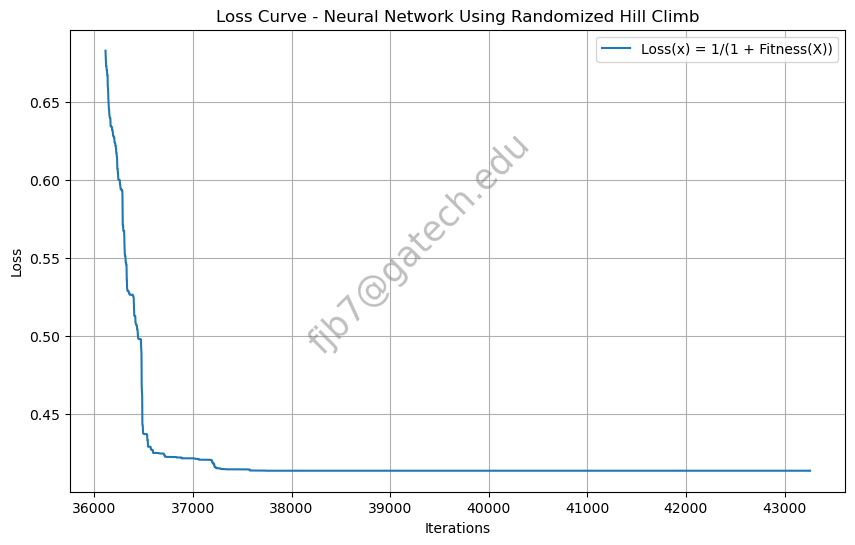

In [8]:
rhc_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[5],
    activation='sigmoid',
    algorithm='random_hill_climb',
    max_iters=7000,
    curve=True,
    learning_rate=1.2,
    max_attempts=150,
    random_state=42,
    restarts=5
)
rhc_nn.fit(X_train, y_train)
print(f"Randomized Hill Climb - Classification Report: \n {classification_report(y_test, rhc_nn.predict(X_test))}")
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - Neural Network Using Randomized Hill Climb')
plt.plot(rhc_nn.fitness_curve[:, 1], rhc_nn.fitness_curve[:, 0], label="Loss(x) = 1/(1 + Fitness(X))")
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.legend()
plt.grid(True)
plt.savefig("./results/nn/rhc/loss_curve.png")
plt.show()

Simulated Annealing - Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       107
           1       0.82      0.92      0.86       131

    accuracy                           0.84       238
   macro avg       0.85      0.83      0.84       238
weighted avg       0.84      0.84      0.84       238



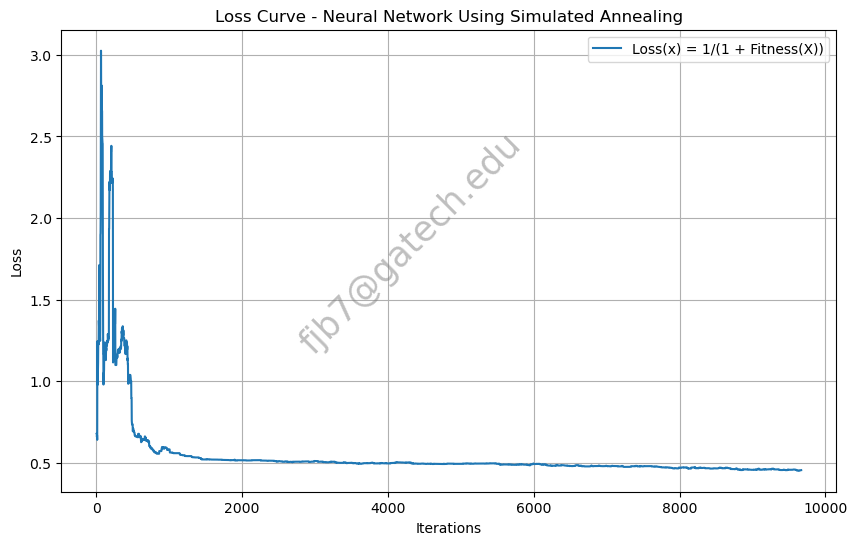

In [9]:
sa_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[5],
    activation='sigmoid',
    algorithm='simulated_annealing',
    max_iters=6000,
    curve=True,
    learning_rate=2.5,
    max_attempts=300,
    random_state=42,
    schedule=mlrose_hiive.GeomDecay()
)
sa_nn.fit(X_train, y_train)
print(f"Simulated Annealing - Classification Report: \n {classification_report(y_test, sa_nn.predict(X_test))}")
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - Neural Network Using Simulated Annealing')
plt.plot(sa_nn.fitness_curve[:, 1], sa_nn.fitness_curve[:, 0], label="Loss(x) = 1/(1 + Fitness(X))")
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.legend()
plt.grid(True)
plt.savefig("./results/nn/sa/loss_curve.png")
plt.show()

Genetic Algorithm - Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.99      0.66       107
           1       0.96      0.17      0.29       131

    accuracy                           0.54       238
   macro avg       0.72      0.58      0.47       238
weighted avg       0.75      0.54      0.45       238



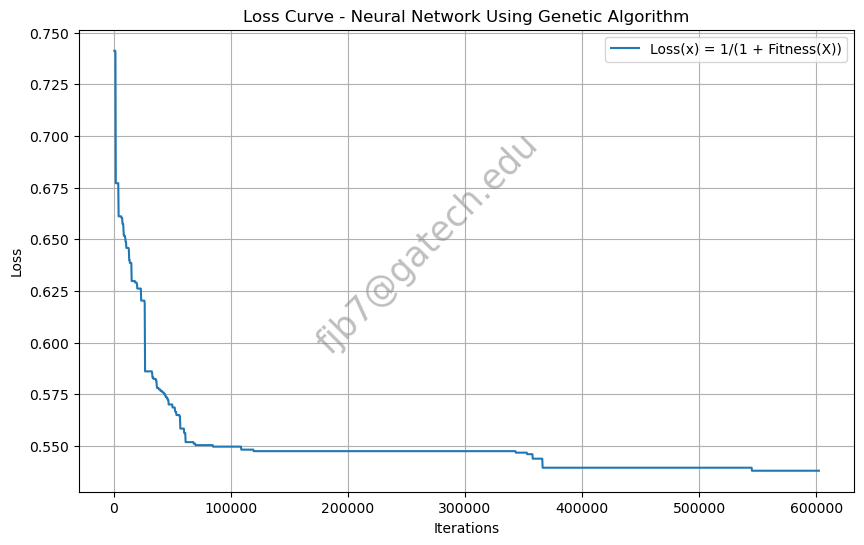

In [10]:
ga_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[5],
    activation='sigmoid',
    algorithm='genetic_alg',
    max_iters=2000,
    learning_rate=0.005,
    pop_size=300,
    mutation_prob=0.005,
    max_attempts=15,
    random_state=42,
    curve=True
)
ga_nn.fit(X_train, y_train)

print(f"Genetic Algorithm - Classification Report: \n {classification_report(y_test, ga_nn.predict(X_test))}")

plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - Neural Network Using Genetic Algorithm')
plt.plot(ga_nn.fitness_curve[:, 1], ga_nn.fitness_curve[:, 0], label="Loss(x) = 1/(1 + Fitness(X))")
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.legend()
plt.grid(True)
plt.savefig("./results/nn/ga/loss_curve.png")
plt.show()

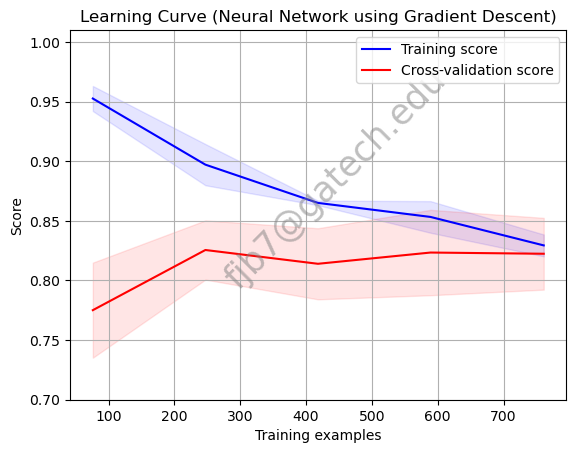

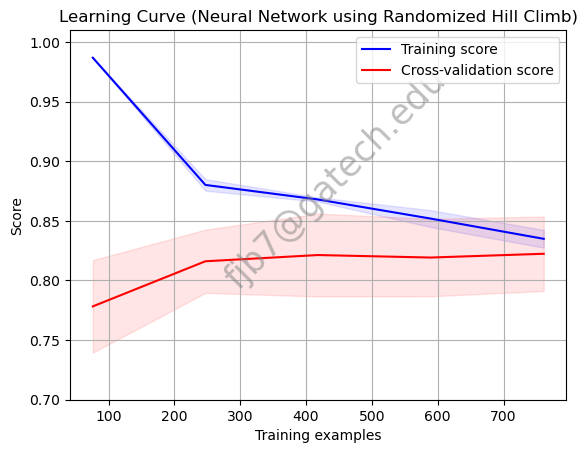

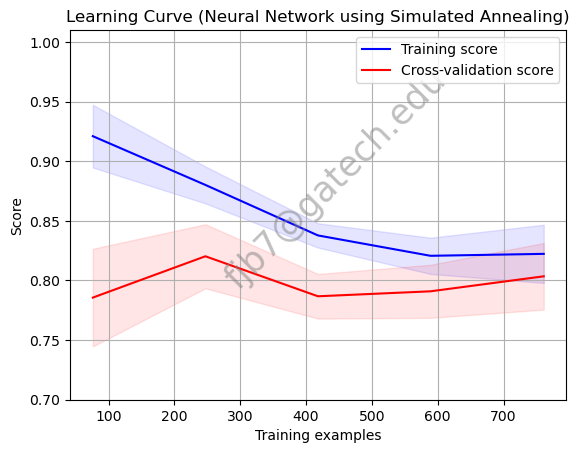

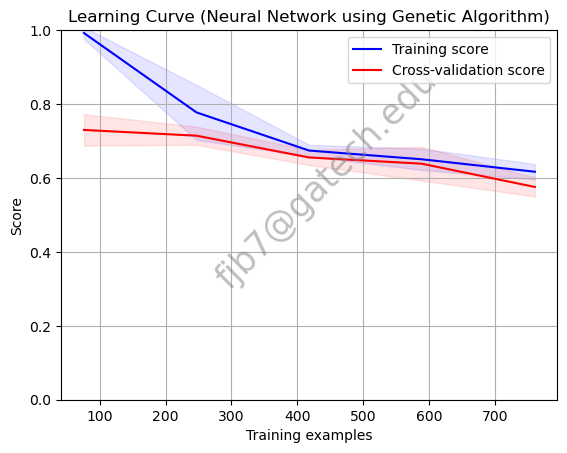

In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="r", label="Cross-validation score")
    plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
    plt.legend(loc="best")
    return plt

title = "Learning Curve (Neural Network using Gradient Descent)"
plot_learning_curve(gd_nn, title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
plt.savefig("./results/nn/gd/learning_curve.png")
plt.show()

title = "Learning Curve (Neural Network using Randomized Hill Climb)"
plot_learning_curve(rhc_nn, title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
plt.savefig("./results/nn/rhc/learning_curve.png")
plt.show()

title = "Learning Curve (Neural Network using Simulated Annealing)"
plot_learning_curve(sa_nn, title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
plt.savefig("./results/nn/sa/learning_curve.png")
plt.show()


title = "Learning Curve (Neural Network using Genetic Algorithm)"
plot_learning_curve(ga_nn, title, X_train, y_train, ylim=(0, 1), cv=5)
plt.savefig("./results/nn/ga/learning_curve.png")
plt.show()

Gradient Descent GD - Accuracy: 0.84
Gradient Descent GD - Sensitivity: 0.88
Gradient Descent GD - Specificity: 0.79
Gradient Descent GD - AUC: 0.83
Genetic Algorithm GA - Accuracy: 0.54
Genetic Algorithm GA - Sensitivity: 0.17
Genetic Algorithm GA - Specificity: 0.99
Genetic Algorithm GA - AUC: 0.58
Simulated Annealing SA - Accuracy: 0.84
Simulated Annealing SA - Sensitivity: 0.92
Simulated Annealing SA - Specificity: 0.75
Simulated Annealing SA - AUC: 0.83
Hill Climbing rhc - Accuracy: 0.84
Hill Climbing rhc - Sensitivity: 0.89
Hill Climbing rhc - Specificity: 0.79
Hill Climbing rhc - AUC: 0.84


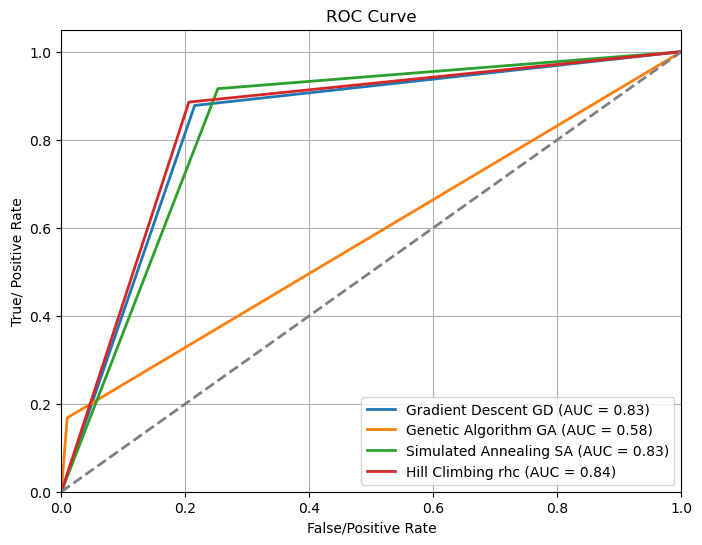

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#defin
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # clc specificity
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    #all in
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"{model_name} - Sensitivity: {sensitivity:.2f}")
    print(f"{model_name} - Specificity: {specificity:.2f}")
    print(f"{model_name} - AUC: {auc:.2f}")

    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc:.2f})')

# Plotin ROC
plt.figure(figsize=(8, 6))
evaluate_model(gd_nn, 'Gradient Descent GD')
evaluate_model(ga_nn, 'Genetic Algorithm GA')
evaluate_model(sa_nn, 'Simulated Annealing SA')
evaluate_model(rhc_nn, 'Hill Climbing rhc')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False/Positive Rate')
plt.ylabel('True/ Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()
